<a href="https://colab.research.google.com/github/macasallasb/Personal_Projects/blob/main/Sesi%C3%B3n_1_2_Local_determination_of_the_Hubble_constant_and_the_deceleration_parameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://habrastorage.org/webt/jq/gc/r5/jqgcr5azmatev6zvgufn8xftehy.png">
    

    
# Análisis de datos cosmológicos y el problema de la constante de Hubble usando Python

### Autor: Michael Casallas Beltran

# <center> Sesión 1.2 Local determination of the Hubble constant and the deceleration parameter
[arXiv:1906.11814](https://arxiv.org/abs/1906.11814)    


# Outline
1. [Magnitud absoluta de Supernovas](#1.-MB)
2. [Analises SH0ES](#2.-SH0ES)
3. [Determinacion local de $H_0$ y $q_0$](#3.-H0/q0)

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/23/Cosmic_distance_ladder.jpg">

## 1.-MB

Observacion de la curva de luz de supernovas del Tipo Ia permite determinar $m_B$

Necesitan ser calibradras para ofrecer distancias cosmologicas:

$$m_B(z) = 5\log_{10}\frac{d_L(z)}{\rm 1 Mpc}+25 + M_B$$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas

plt.rcParams['font.size'] = '18'

In [ ]:
! pip install gdown
import os
if not 'datos_sesion1-2.tar.gz' in os.listdir():
  ! gdown --id 1Xiw04RSjKvdOjLB7BQxFNVgH54yh5RRp --output datos_sesion1-2.tar.gz
  ! tar -xvf datos_sesion1-2.tar.gz

Downloading...
From: https://drive.google.com/uc?id=1Xiw04RSjKvdOjLB7BQxFNVgH54yh5RRp
To: /content/datos_sesion1-2.tar.gz
100% 172k/172k [00:00<00:00, 62.9MB/s]
datos_sesion1-2/
datos_sesion1-2/Pantheon-low/
datos_sesion1-2/Pantheon-low/cov_low-sne.dat
datos_sesion1-2/Pantheon-low/low-sne.txt


In [ ]:
sne_datos = pandas.read_table('datos_sesion1-2/Pantheon-low/low-sne.txt',sep='\t')

cov_sne = pandas.read_table('datos_sesion1-2/Pantheon-low/cov_low-sne.dat')
cov_sne = np.array(cov_sne).reshape((237, 237))

sne_datos.head()

,#name,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,cov_m_s,cov_m_c,cov_s_c,set,ra,dec,biascor
0,06D2fb,0.12531,0.12531,0.0,19.46840,0.10355,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,744,0.12679,0.12679,0.0,19.54290,0.11965,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,1241,0.08859,0.08859,0.0,18.64345,0.10605,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,1371,0.11782,0.11782,0.0,19.19345,0.09910,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,1794,0.14055,0.14055,0.0,19.87100,0.11635,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
z_sne = np.array(sne_datos['zcmb'])
mb_sne = np.array(sne_datos['mb'])
dmb_sne = np.array(sne_datos['dmb'])

# z_sne = sne_datos['zcmb']
# mb_sne = sne_datos['mb']
# dmb_sne = sne_datos['dmb']

cov_sne_tot = cov_sne + np.diag(sne_datos['dmb'])**2
inv_cov_sne = np.linalg.inv(cov_sne_tot)

print('zmin, zmax: %.4f, %.4f'%(np.min(z_sne),np.max(z_sne)))

zmin, zmax: 0.0235, 0.1495


Asumiendo un prior Gaussiano en $M_B = \mathcal{N}\left({\hat{M}_B,\sigma_{M}}\right)$ y dada la forma espcial de la likelihood es posible convertir la posterior en $H_0$ en un prior en $M_B$

$$\hat{H}_0 = \exp(\mu_{\ln} + 0.5\sigma^2_{\ln})$$

$$\sigma_H^2 = \exp(2\mu_{\ln} + \sigma^2_{\ln})\left(\exp \sigma^2_{\ln} - 1\right)$$

$$ \mu_{\ln} = \frac{\ln 10}{5} \left[ \hat{M}_B + \frac{\ln 10}{5} \left( \sigma^2_M + \frac{1}{S_0} \right) - \frac{S_1}{S_0} \right]$$

$$ \sigma_{\ln} =\frac{\ln 10}{5} \sqrt{\sigma^2_M + \frac{1}{S_0}}$$

Donde $S_0$ y $S_1$ siguen:

$$S_0 = V_i C^{-1}_{ij} V_j \,, \,\,\,\, S_1= W_i C^{-1}_{ij} V_j$$

$$W_i = m_{B,i} - x_B(z_i)\,,\,\,\, V_i = 1 \,,\,\, x_B(z_i) = 5\log_{10}\left(cz\left[1+\frac{1}{2}(1-q_0)z-\frac{1}{6}(1-q_0-3q_0^2+j_0)z^2\right]\right) + 25$$

In [ ]:
from scipy import constants
cc = constants.c/1000.

Calcula S_0 y S_1

In [ ]:
def mBtilde(z):
  q0 = -0.55
  j0 = 1.
  term1 = 0.5*(1-q0)*z
  term2 = -(1-q0-3*q0**2+j0)*z**2/6.
  mBt = 5*np.log10(cc*z*(1+term1+term2)) + 25
  return mBt

In [ ]:
V_i = np.ones(len(inv_cov_sne))
S0 = np.dot(np.dot(V_i,inv_cov_sne),V_i)

W_i = mb_sne - mBtilde(z_sne)
S1 = np.dot(np.dot(W_i,inv_cov_sne),V_i)
print(S0,S1)

10689.40997018274 -305342.85709496


Usando como posterior $H_0 = \mathcal{N}({73.5,1.4})$ [Ried et al., 2019](https://arxiv.org/abs/1908.05625) calcula el prior en $M_B$

In [ ]:
H0_ini = 73.5
sig_H0_ini = 1.4

In [ ]:
def mu_lnH(MB_p, sigma_M_p):
    mu = 0.2*np.log(10)*(MB_p - S1/S0 + (1/S0 + sigma_M_p**2)*0.2*np.log(10))
    return mu

def sigma_lnH(MB_p, sigma_M_p):
    sig = 0.2*np.log(10)*np.sqrt(1/S0+sigma_M_p**2)
    return sig

In [ ]:
def media_H(MB_p, sigma_M_p):
    mean = np.exp(mu_lnH(MB_p, sigma_M_p) + 0.5*sigma_lnH(MB_p, sigma_M_p)**2)
    return mean

def varia_H(MB_p, sigma_M_p):
    var = np.exp(2*mu_lnH(MB_p, sigma_M_p)+sigma_lnH(MB_p, sigma_M_p)**2)*(-1+np.exp(sigma_lnH(MB_p, sigma_M_p)**2))
    return var

In [ ]:
def sol_MB_prior(vec):
    MB_p, sigma_M_p = vec
    ecua1 = media_H(MB_p, sigma_M_p) - H0_ini
    ecua2 = varia_H(MB_p, sigma_M_p) - sig_H0_ini**2
    return [ecua1,ecua2]

In [ ]:
from scipy import optimize
MB_fin, sigma_MB_fin =optimize.fsolve(sol_MB_prior,[-19,0.04])

In [ ]:
print(MB_fin, sigma_MB_fin)

-19.23473186817753 0.04021073104604428


$$p(M_B) = \mathcal{N} (-19.234,0.0402)$$

## 2.-SH0ES

Analisis independiente del modelo a traves de expansion cosmografica ([gr-qc/0411131](https://arxiv.org/abs/gr-qc/0411131)):

$$d_L(z) = \frac{cz}{H_0} \left\lbrace 1+\frac{1}{2}(1-q_0)z-\frac{1}{6}(1-q_0-3q_0^2+j_0)z^2 + \mathcal{O}(z^3) \right\rbrace$$

$$m_B(z) = m_B(z,H_0,q_0,j_0,...)$$

Analisis de SH0ES asume $q_0 = -0.55$ y $j_0 = 1.$ (valores obtenidos con $\Lambda$CDM)

In [ ]:
def cosmografia_dL(z,H0,q0,j0=None):
  term1 = 0.5*(1.-q0)*z
  if j0==None:
    term2 = 0.
  else:
    term2 = -(1.0 - q0-3*q0**2+j0)*z**2/6.
  dL = cc*z*(1+term1+term2)/H0
  return dL

In [ ]:
cosmografia_dL(z=0.5,H0=70,q0=-0.5,j0=1.0)

2788.2483072916666

In [ ]:
def cosmografia_mB_sh0es(vec):
  H0, MB = vec
  q0 = -0.55
  j0 =1.0
  cosmom  = 5*np.log10(cosmografia_dL(z_sne,H0,q0,j0)) +25 + MB
  return cosmom

Define la distancia de luminosidad usando la expansion cosmografica. Realiza un grafico para redshifts $z = [0.,0.15]$ considerando dos casos $\left\lbrace q_0 = -0.55, j0 = 1\right\rbrace$ y $\left\lbrace  q_0 = -0.75, j_0 = 1.2\right\rbrace$ ($H_0 = 70$ para ambos casos)

Text(0, 0.5, '$m_B(z)$')

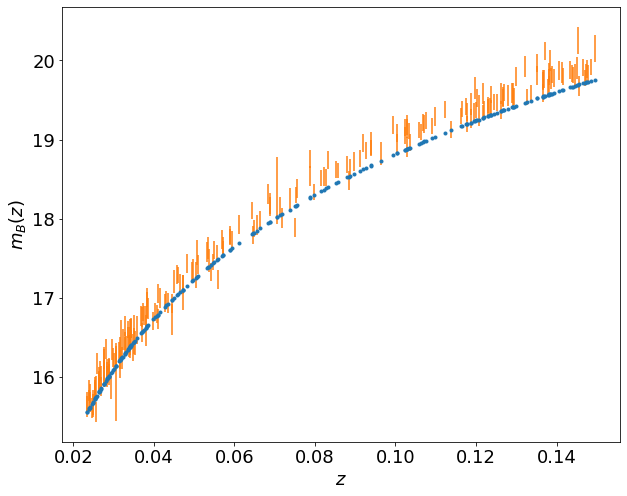

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.plot(z_sne,cosmografia_mB_sh0es([70.,-19.5]),'.')
ax.errorbar(z_sne,mb_sne,dmb_sne,ls=' ')

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$m_B(z)$')

Construye $\chi^2$ para supernovas usando la expansion cosmografica. Calcula el caso de $H_0 = 73$, $q_0 = -0.55$ y $j_0 = 1.$

In [ ]:
def chi2_sn(theta_vec):
    mB_theo = cosmografia_mB_sh0es(theta_vec)
    diff = mb_sne - mB_theo
    chi2sn = np.dot(np.dot(diff,inv_cov_sne),diff)
    return chi2sn

log_lkl_sn = lambda theta_vec: -0.5*chi2_sn(theta_vec)

In [ ]:
chi2_sn([70.,-19])

1467.0664941247

In [ ]:
def log_prior_MB(theta_vec):
  H0,MB = theta_vec
  logpM = -0.5*(MB-MB_fin)**2/sigma_MB_fin**2
  return logpM

In [ ]:
H0max = 78
H0min = 64
MBmin=-19.7
MBmax=-18.8


def log_flat_prior(theta_vec):
    H0,MB=theta_vec
    if not (H0min<=H0<=H0max):
        return -np.inf
    elif not (MBmin<=MB<=MBmax):
        return -np.inf
    else:
        return 0.0

def log_likelihood(theta_vec):
    H0,MB=theta_vec
    loglikelihood = log_lkl_sn(theta_vec) + log_flat_prior(theta_vec) + log_prior_MB(theta_vec)
    return loglikelihood

In [ ]:
log_likelihood([H0min-1e-12,MBmin-1e-12]),log_likelihood([H0max+1e-12,MBmax+1e-12])

(-inf, -inf)

In [ ]:
primer_bf = np.array([73.5,-19.4])
%timeit log_likelihood(primer_bf)

The slowest run took 15.29 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 76.1 µs per loop


In [ ]:
%timeit chi2_sn(primer_bf)

The slowest run took 38.82 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 63.6 µs per loop


## 2.a- emcee: Affine Invariant Markov chain Monte Carlo (MCMC) Ensemble sampler
[Codigo disponible aqui](https://emcee.readthedocs.io/en/stable/)

<center>
<img src="https://miro.medium.com/max/1838/1*QdYUe-nZYZnOfj_Oqt9CHw.jpeg">

In [ ]:
! pip install emcee
import emcee

ncaminantes = 32
npasos = 25000 # 250000
burn_in = 500

punto_ini = primer_bf + 1e-3*np.random.randn(ncaminantes, len(primer_bf))

In [ ]:
sampler_shoes = emcee.EnsembleSampler(ncaminantes, 2, log_likelihood)

nuevo_ini = sampler_shoes.run_mcmc(punto_ini, burn_in)
sampler_shoes.reset()

In [ ]:
import time

t0 = time.time()

sampler_shoes.run_mcmc(nuevo_ini, npasos)

t1 = time.time()
(t1-t0)/60

1.4915082732836404

In [ ]:
sampler_shoes.get_chain(flat=True,thin=2).shape

(400000, 2)

In [ ]:
samples_shoes = sampler_shoes.get_chain(flat=True,thin=2)
loglikes_shoes = sampler_shoes.get_log_prob(flat=True,thin=2)

## 2.b- GetDist: Python package for analysing and plotting MonteCarlo samples
[Codigo disponible aqui](https://getdist.readthedocs.io/en/latest/)

<center>
<img src="https://www.leansixsigmadefinition.com/wp-content/uploads/2019/10/six_sigma_definition_standard_deviations.jpg">

In [ ]:
! pip install getdist
import getdist
from getdist import plots, MCSamples
samp_shoes = getdist.mcsamples.MCSamples(samples=samples_shoes, names = ['H0','MB'], labels = ['H_0','M_B'])

samp_shoes.updateSettings({'contours': [0.682689492137086, 0.954499736103642,0.997300203936740]})

     |████████████████████████████████| 778kB 4.2MB/s 
  Created wheel for getdist: filename=GetDist-1.2.1-cp37-none-any.whl size=220592 sha256=5fbede98c1dd9d9518713540c0adc37b04ac0ae355b9a40455c00f07fd564289
  Stored in directory: /root/.cache/pip/wheels/81/ac/6b/7d305824ccdaa43cfffc4e844c14808dd5725bde9288eaad58
Successfully built getdist
Removed no burn in


(2, 1)

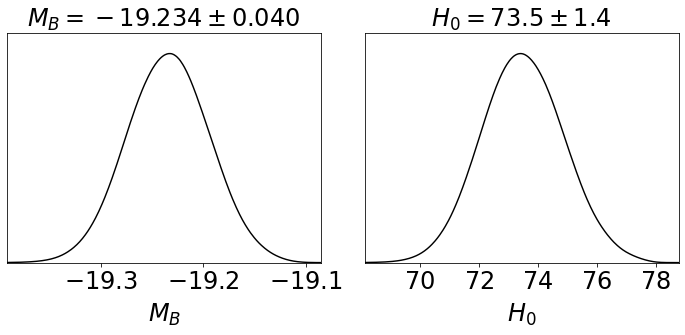

In [ ]:
g = plots.get_subplot_plotter(width_inch=10,)
g.settings.legend_fontsize = 24
g.settings.axes_fontsize = 24
g.settings.axes_labelsize = 24

g.plots_1d(samp_shoes,['MB','H0'],nx=2, title_limit=1)

((68.13163409481997, 78.77521734322677),
 (-19.39176246271158, -19.084970572614502))

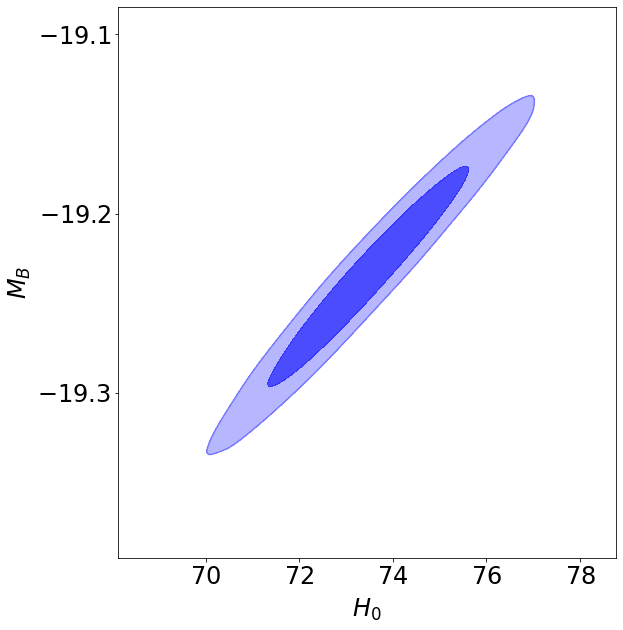

In [ ]:
g = plots.get_single_plotter(width_inch=9,ratio=1.01)
g.settings.legend_fontsize = 24
g.settings.axes_fontsize = 24
g.settings.axes_labelsize = 24

g.plot_2d(samp_shoes, 'H0', 'MB', filled=True, colors=['blue'], alphas=[0.7,0.6])

In [ ]:
stat = samp_shoes.getMargeStats()
print(stat)

Marginalized limits: 0.682689492137086; 0.954499736103642; 0.99730020393674

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
H0          7.3491961E+01  1.4040029E+00  7.2084886E+01  7.4906752E+01  two    7.0725801E+01  7.6347370E+01  two    6.9367961E+01  7.7564459E+01  two     H_0
MB         -1.9234249E+01  4.0329959E-02 -1.9274758E+01 -1.9193593E+01  two   -1.9314719E+01 -1.9153639E+01  two   -1.9355593E+01 -1.9119218E+01  two     M_B



In [ ]:
(73.49196 - 66.7)/1.4

4.851400000000003

<Figure size 720x727.2 with 0 Axes>

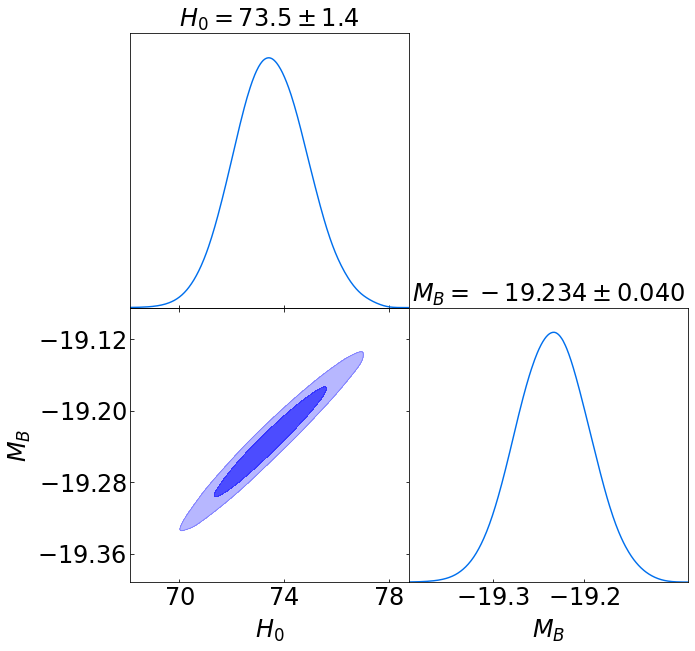

In [ ]:
g = plots.get_single_plotter(width_inch=10,ratio=1.01)
g.settings.legend_fontsize = 24
g.settings.axes_fontsize = 24
g.settings.axes_labelsize = 24

g.triangle_plot(samp_shoes, ['H0', 'MB'], filled=True, colors=['blue'], alphas=[0.7,0.6],title_limit=1,)

## 3.-H0/q0

Nuestro analisis asume $q_0$ libre y $d_L(z)$ hasta $\mathcal{O}(z^2)$

$$d_L(z) = \frac{cz}{H_0} \left\lbrace 1+\frac{1}{2}(1-q_0)z \right\rbrace$$



Repetir analisis para este caso

In [ ]:
# Sigue los pasos:
# 1.- Generaliza cosmografia_mB_sh0es (cosmografia_mB) de tal manera que la nueva funcion
# tenga como argumento un vector [H0,q0,MB]
# 2.- Actualiza chi2_sn([H0,q0,MB]) de manera que ahora use cosmografia_mB
# 3.- Actualiza log_flat_prior([H0,q0,MB]) usando q0min = -2.5, q0max = 0.5
# 4.- Reconstruyer log_likelihood([H0,q0,MB])

Reproducir Fig.1 de [arXiv:1906.11814](https://arxiv.org/abs/1906.11814)    

Analizar $\Lambda$CDM con CC y SNe (sesion 1.1) usando emcee y getdsit.